# Продвинутая визуализация с matplotlib

## Урок 3. Несколько графиков на одном полотне

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Разбор практического задания

In [ ]:
df = pd.read_csv('wage-data-coast.csv')
df

,Year,State,Salary,IsCoastal
0,1968,Alabama,0.00000,0
1,1968,Alaska,2.10000,1
2,1968,Arizona,0.66000,0
3,1968,Arkansas,0.15625,0
4,1968,California,1.65000,1
...,...,...,...,...
2745,2017,Virginia,7.25000,1
2746,2017,Washington,11.00000,1
2747,2017,West Virginia,8.75000,0
2748,2017,Wisconsin,7.25000,0


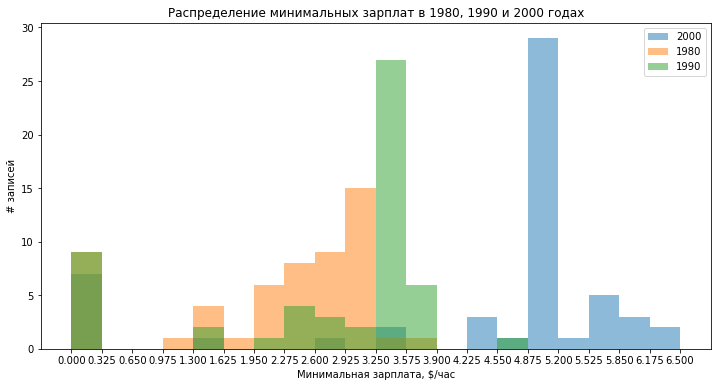

In [ ]:
data = df[df['Year'] == 1980]['Salary']
data1 = df[df['Year'] == 1990]['Salary']
data2 = df[df['Year'] == 2000]['Salary']


fig, ax = plt.subplots(figsize=(12,6))
_, bins, _ = ax.hist(data2, label='2000', alpha=0.5, bins=20)
ax.hist(data, label='1980', alpha=0.5, bins=bins)
ax.hist(data1, label='1990', alpha=0.5, bins=bins)


ax.set_title('Распределение минимальных зарплат в 1980, 1990 и 2000 годах')
ax.set_xlabel('Минимальная зарплата, $/час')
ax.set_ylabel('# записей')
ax.set_xticks(bins)
ax.legend()

plt.show()

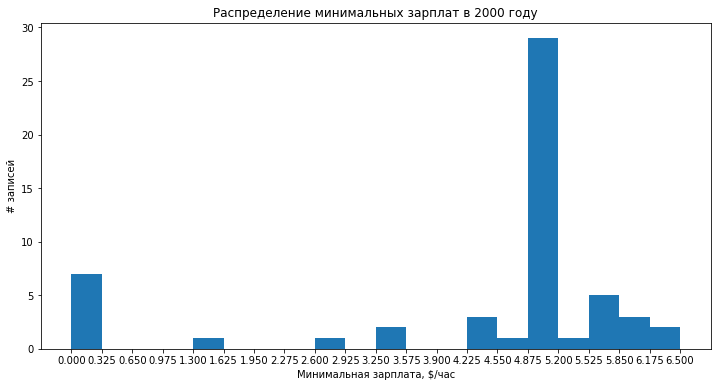

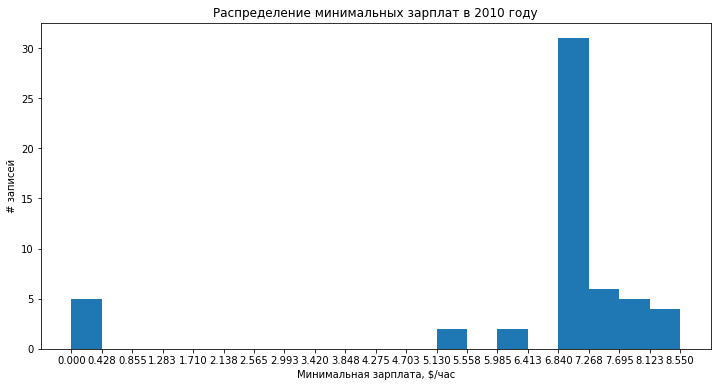

In [ ]:
for year in [2000, 2010]:
    data = df[df['Year'] == year]['Salary']


    fig, ax = plt.subplots(figsize=(12,6))
    _, bins, _ = ax.hist(data, label=str(year), bins=20)

    ax.set_title('Распределение минимальных зарплат в ' + str(year) + ' году')
    ax.set_xlabel('Минимальная зарплата, $/час')
    ax.set_ylabel('# записей')
    ax.set_xticks(list(bins))

### Вывод нескольких графиков на одном полотне

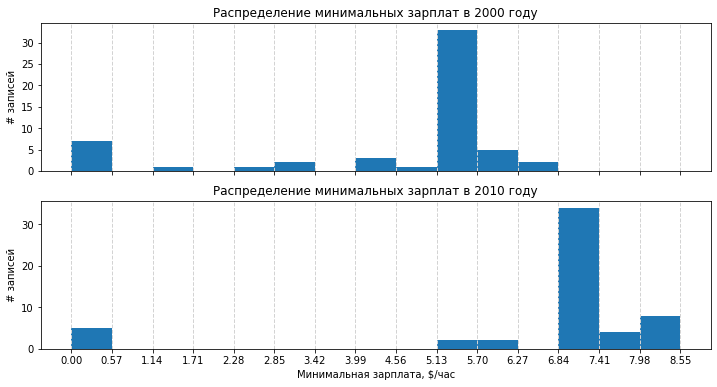

In [ ]:
fig, axs = plt.subplots(figsize=(12, 6), ncols=1, nrows=2, sharex=True)

data = df[df['Year'] == 2000]['Salary']
data1 = df[df['Year'] == 2010]['Salary']

_, bins1, _ = axs[1].hist(data1, bins=15)
axs[0].hist(data, bins=bins1)

axs[0].set_xticks(bins1)
axs[1].set_xticks(bins1)

axs[0].set_title('Распределение минимальных зарплат в 2000 году')
axs[0].set_ylabel('# записей')

axs[1].set_title('Распределение минимальных зарплат в 2010 году')
axs[1].set_xlabel('Минимальная зарплата, $/час')
axs[1].set_ylabel('# записей')

for bin_ in list(bins1):
    for ax in axs:
        ax.axvline(x=bin_, color='lightgray', linewidth=1, linestyle='--')

plt.show()

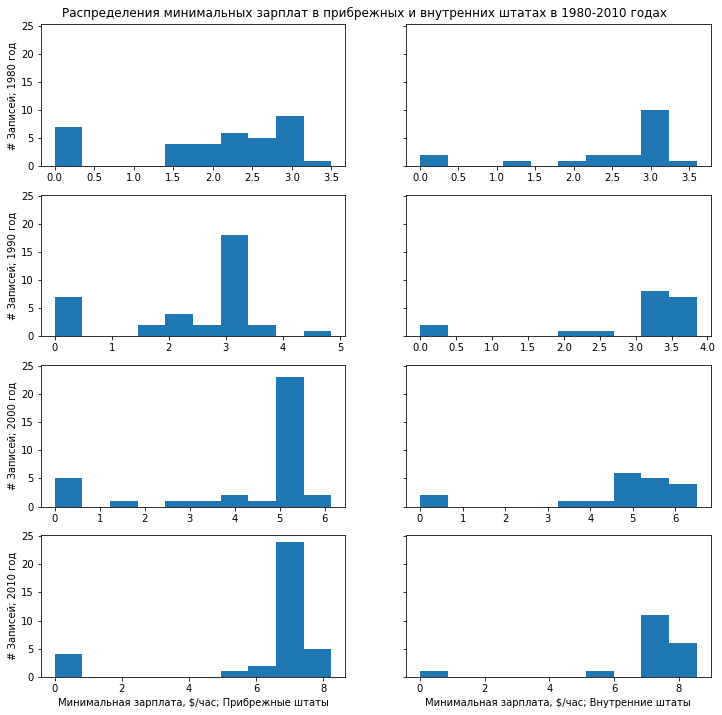

In [ ]:
fig, axs = plt.subplots(figsize=(12, 12), nrows=4, ncols=2, sharey=True)

years = [1980, 1990, 2000, 2010]
is_coastal = [0, 1]

for i in range(len(years)):
    for j in range(len(is_coastal)):
        data = df[(df['Year'] == years[i]) & (df['IsCoastal'] == is_coastal[j])]['Salary']
        ax = axs[i][j]
        ax.hist(data)
        
        if i == len(years) - 1:
            states_type = 'Прибрежные' if is_coastal[j] == 0 else 'Внутренние'
            ax.set_xlabel('Минимальная зарплата, $/час; ' + states_type + ' штаты')
        
        if j == 0:
            ax.set_ylabel('# Записей; ' + str(years[i]) + ' год')

fig.suptitle("Распределения минимальных зарплат в прибрежных и внутренних штатах в 1980-2010 годах",
             y=0.90)
plt.show()